# 1. Data Processing:

In [1]:
# Data preparation:

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing

df_car1 = pd.read_csv("cardata.csv")


In [2]:
df_car1.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
# checking obseravations and attributes
df_car1.shape

(205, 26)

In [4]:
# information of dataset, datatype of variables
df_car1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
#let's print the column names for this dataset.

df_car1.columns.to_list()

['symboling',
 'normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [6]:
#Let's have a look at 10 randomly selected rows in this raw dataset. We will display the last 5 columns so that we do not clutter the output.

df_car1.iloc[:, -5:].sample(n=10, random_state=8)

,horsepower,peak-rpm,city-mpg,highway-mpg,price
65,120,5000,19,27,18280
141,82,4800,32,37,7126
194,114,5400,23,28,12940
204,114,5400,19,25,22625
188,100,5500,26,32,9995
42,100,5500,25,31,10345
150,62,4800,35,39,5348
23,102,5500,24,30,7957
146,82,4800,28,32,7463
110,95,4150,25,25,13860


In [7]:
# dropping index 
#df = df.set_index('Car_ID')

In [8]:
# description of the data
df_car1.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [9]:
#will show all columns of data frame:
df_car1.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [10]:
# define a simple data frame with name and date of birth (DOB) of three individuals
df_car = df_car1[['symboling','make', 'fuel-type','aspiration','num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base','engine-type', 'num-of-cylinders','engine-size', 'fuel-system','price', ]]

In [11]:
df_car
#row 161 has unmatched age(replacing it with mean value)
#df_car['normalized-losses'].replace('?',' ', inplace=True)


,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,engine-type,num-of-cylinders,engine-size,fuel-system,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,dohc,four,130,mpfi,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,dohc,four,130,mpfi,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,ohcv,six,152,mpfi,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,ohc,four,109,mpfi,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,ohc,five,136,mpfi,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,ohc,four,141,mpfi,16845
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,ohc,four,141,mpfi,19045
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,ohcv,six,173,mpfi,21485
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,ohc,six,145,idi,22470


In [12]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fuel-type         205 non-null    object 
 3   aspiration        205 non-null    object 
 4   num-of-doors      205 non-null    object 
 5   body-style        205 non-null    object 
 6   drive-wheels      205 non-null    object 
 7   engine-location   205 non-null    object 
 8   wheel-base        205 non-null    float64
 9   engine-type       205 non-null    object 
 10  num-of-cylinders  205 non-null    object 
 11  engine-size       205 non-null    int64  
 12  fuel-system       205 non-null    object 
 13  price             205 non-null    object 
dtypes: float64(1), int64(2), object(11)
memory usage: 22.5+ KB


In [13]:
# Coverting object type in a correct type :
df_car['price'] = pd.to_numeric(df_car['price'],errors = 'coerce')
#df['rating'] = df['rating'].fillna(df['rating'].mean())

In [14]:
 #converting to binary data
df_car['num-of-doors'].astype(str)
# converting to binary data
df_car['num-of-doors'][df_car['num-of-doors'] == 'two'] = 2
df_car['num-of-doors'][df_car['num-of-doors'] == 'four'] = 4
print(df_car)

     symboling         make fuel-type aspiration num-of-doors   body-style  \
0            3  alfa-romero       gas        std            2  convertible   
1            3  alfa-romero       gas        std            2  convertible   
2            1  alfa-romero       gas        std            2    hatchback   
3            2         audi       gas        std            4        sedan   
4            2         audi       gas        std            4        sedan   
..         ...          ...       ...        ...          ...          ...   
200         -1        volvo       gas        std            4        sedan   
201         -1        volvo       gas      turbo            4        sedan   
202         -1        volvo       gas        std            4        sedan   
203         -1        volvo    diesel      turbo            4        sedan   
204         -1        volvo       gas      turbo            4        sedan   

    drive-wheels engine-location  wheel-base engine-type num-of

In [15]:
df_car['num-of-doors'] = pd.to_numeric(df_car['num-of-doors'],errors = 'coerce')

In [16]:
 #converting to binary data
# converting to binary data
df_car['num-of-cylinders'][df_car['num-of-cylinders'] == 'two'] = 2
df_car['num-of-cylinders'][df_car['num-of-cylinders'] == 'three'] = 3
df_car['num-of-cylinders'][df_car['num-of-cylinders'] == 'four'] = 4
df_car['num-of-cylinders'][df_car['num-of-cylinders'] == 'five'] = 5

df_car['num-of-cylinders'][df_car['num-of-cylinders'] == 'six'] = 6
df_car['num-of-cylinders'][df_car['num-of-cylinders'] == 'eight'] = 8
df_car['num-of-cylinders'][df_car['num-of-cylinders'] == 'twelve'] = 12


print(df_car)

     symboling         make fuel-type aspiration  num-of-doors   body-style  \
0            3  alfa-romero       gas        std           2.0  convertible   
1            3  alfa-romero       gas        std           2.0  convertible   
2            1  alfa-romero       gas        std           2.0    hatchback   
3            2         audi       gas        std           4.0        sedan   
4            2         audi       gas        std           4.0        sedan   
..         ...          ...       ...        ...           ...          ...   
200         -1        volvo       gas        std           4.0        sedan   
201         -1        volvo       gas      turbo           4.0        sedan   
202         -1        volvo       gas        std           4.0        sedan   
203         -1        volvo    diesel      turbo           4.0        sedan   
204         -1        volvo       gas      turbo           4.0        sedan   

    drive-wheels engine-location  wheel-base engine

In [17]:
df_car['num-of-cylinders'] = pd.to_numeric(df_car['num-of-cylinders'],errors = 'coerce')

In [18]:
df_car

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,engine-type,num-of-cylinders,engine-size,fuel-system,price
0,3,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,dohc,4,130,mpfi,13495.0
1,3,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,dohc,4,130,mpfi,16500.0
2,1,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,ohcv,6,152,mpfi,16500.0
3,2,audi,gas,std,4.0,sedan,fwd,front,99.8,ohc,4,109,mpfi,13950.0
4,2,audi,gas,std,4.0,sedan,4wd,front,99.4,ohc,5,136,mpfi,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,4.0,sedan,rwd,front,109.1,ohc,4,141,mpfi,16845.0
201,-1,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,ohc,4,141,mpfi,19045.0
202,-1,volvo,gas,std,4.0,sedan,rwd,front,109.1,ohcv,6,173,mpfi,21485.0
203,-1,volvo,diesel,turbo,4.0,sedan,rwd,front,109.1,ohc,6,145,idi,22470.0


# 2.Cleaning the dataset:


In [19]:
#Checking for Missing Values 
#Models in Scikit-Learn do not work with data with missing values. 
#Let's check to see which columns have missing values in our dataset. 
#Missing values are a bit complicated in Python as they can be denoted by either "na" or "null" in Pandas (both mean the same thing). Furthermore, NumPy denotes missing values as "NaN" (that is, "not a number").
df_car.isna().sum()

symboling           0
make                0
fuel-type           0
aspiration          0
num-of-doors        2
body-style          0
drive-wheels        0
engine-location     0
wheel-base          0
engine-type         0
num-of-cylinders    0
engine-size         0
fuel-system         0
price               4
dtype: int64

In [20]:
df_car["num-of-doors"]

0      2.0
1      2.0
2      2.0
3      4.0
4      4.0
      ... 
200    4.0
201    4.0
202    4.0
203    4.0
204    4.0
Name: num-of-doors, Length: 205, dtype: float64

In [21]:
df_car["num-of-doors"]=df_car["num-of-doors"].fillna(df_car["num-of-doors"].mean())

In [22]:
# we can see that there are some missing values in price variable
# lets find its mean
df_car["price"].mean()

13207.129353233831

In [23]:
# replacing missing values with mean
df_car["price"]= df_car["price"].fillna(df_car["price"].mean())

In [24]:
df_car.isna().sum()

symboling           0
make                0
fuel-type           0
aspiration          0
num-of-doors        0
body-style          0
drive-wheels        0
engine-location     0
wheel-base          0
engine-type         0
num-of-cylinders    0
engine-size         0
fuel-system         0
price               0
dtype: int64

In [25]:
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# Explolatory Analysis:
 

In [26]:
# description of the data
df_car.describe()

,symboling,num-of-doors,wheel-base,num-of-cylinders,engine-size,price
count,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000
mean,0.8341,3.1232,98.7566,4.3805,126.9073,13207.1294
std,1.2453,0.9900,6.0218,1.0809,41.6427,7868.7682
min,-2.0000,2.0000,86.6000,2.0000,61.0000,5118.0000
25%,0.0000,2.0000,94.5000,4.0000,97.0000,7788.0000
50%,1.0000,4.0000,97.0000,4.0000,120.0000,10595.0000
75%,2.0000,4.0000,102.4000,4.0000,141.0000,16500.0000
max,3.0000,4.0000,120.9000,12.0000,326.0000,45400.0000


(205, 14)

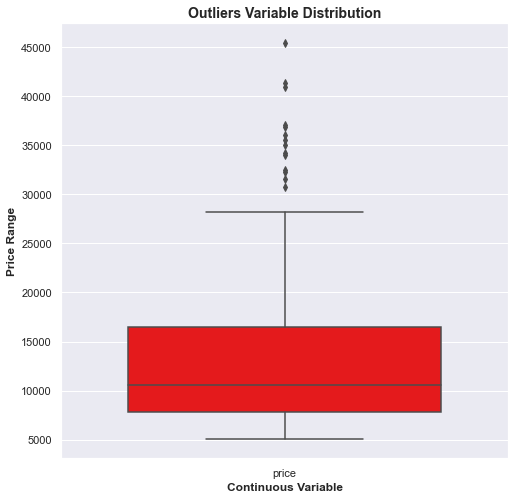

In [27]:
# Outlier Analysis of target variable with maximum amount of Inconsistency

outliers = ['price']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df_car[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
df_car.shape

Insights:
There are some price ranges above 36000 which can be termed as outliers but lets not remove it rather we will use standarization scaling.
we can see the outliers present in the price variable


In [28]:
# Extracting Car Company from the CarName as per direction in Problem 

df_car['make'] = df_car['make'].str.split(' ',expand=True)
# Unique Car company

df_car['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [29]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = df_car.select_dtypes(include=['object']).columns
num_col = df_car.select_dtypes(exclude=['object']).columns
df_cat = df_car[cat_col]
df_num = df_car[num_col]


## Step 3: Visualising the Data
Here we will identify if some predictors directly have a strong association with the outcome variable price

Text(0, 0.5, 'Count of Cars')

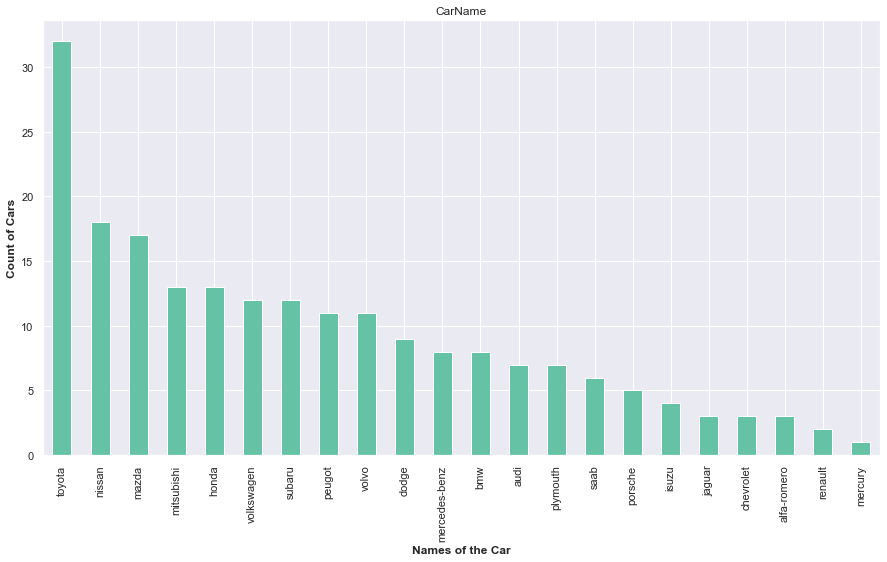

In [30]:
plt.rcParams['figure.figsize'] = [15,8]
ax=df_car['make'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set2')
ax.title.set_text('CarName')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

## Insights:
Toyota seems to be the most favoured cars.

Mercury seems to be the least favoured cars.
## Visualizing the distribution of car prices


<AxesSubplot:title={'center':'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

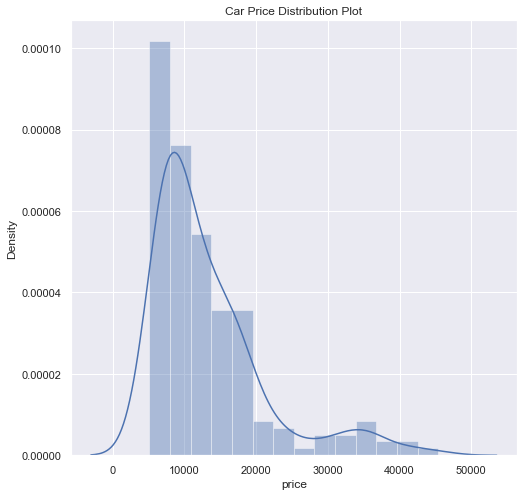

In [31]:
plt.figure(figsize=(8,8))

plt.title('Car Price Distribution Plot')
sns.distplot(df_car['price'])

The plots seems to be right skewed, the prices of almost all cars looks like less than 18000.


 ####  Visualising Numeric Variables


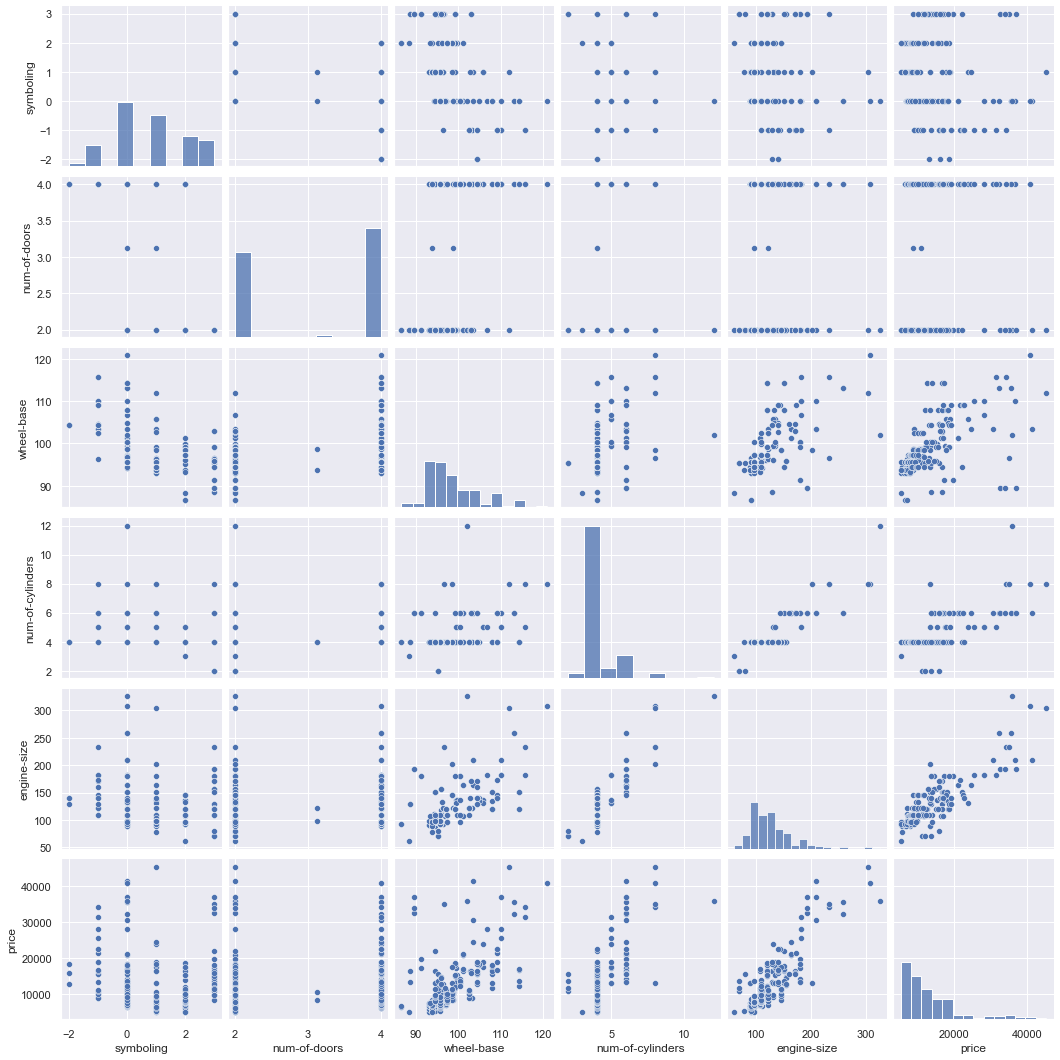

In [32]:
#Pairplot of all the numeric variables

ax = sns.pairplot(df_car[num_col])
ax

Insights:

carwidth , carlength, curbweight ,enginesize ,horsepowerseems to have a poitive correlation with price.

carheight doesn't show any significant trend with price.

citympg , highwaympg - seem to have a significant negative correlation with price.

#### Visualising few more Categorical Variables
Boxplot of all the categorical variables

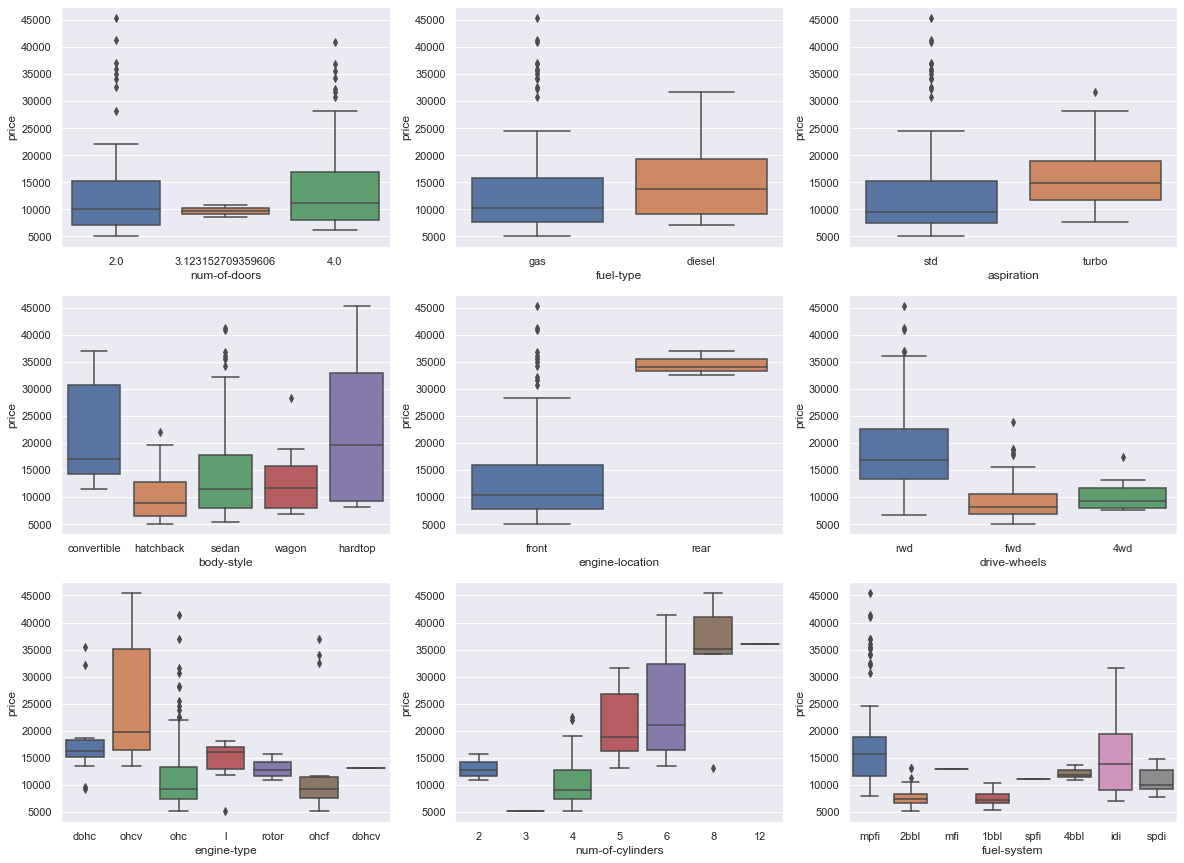

In [33]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'num-of-doors', y = 'price', data = df_car)
plt.subplot(3,3,2)
sns.boxplot(x = 'fuel-type', y = 'price', data = df_car)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = df_car)
plt.subplot(3,3,4)
sns.boxplot(x = 'body-style', y = 'price', data = df_car)
plt.subplot(3,3,5)
sns.boxplot(x = 'engine-location', y = 'price', data = df_car)
plt.subplot(3,3,6)
sns.boxplot(x = 'drive-wheels', y = 'price', data = df_car)
plt.subplot(3,3,7)
sns.boxplot(x = 'engine-type', y = 'price', data = df_car)
plt.subplot(3,3,8)
sns.boxplot(x = 'num-of-cylinders', y = 'price', data = df_car)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuel-system', y = 'price', data = df_car)
plt.show()

#### Insights
The cars with fueltype as diesel are comparatively expensive than the cars with fueltype as gas.

All the types of carbody is relatively cheaper as compared to convertible carbody.

The cars with rear enginelocation are way expensive than cars with front enginelocation.

The price of car is directly proportional to no. of cylinders in most cases.

Enginetype ohcv comes into higher price range cars.

DoorNumber isn't affecting the price much.

HigerEnd cars seems to have rwd drivewheel

[Text(0.5, 0, 'Car Body'), Text(0, 0.5, 'Frequency of Car Body')]

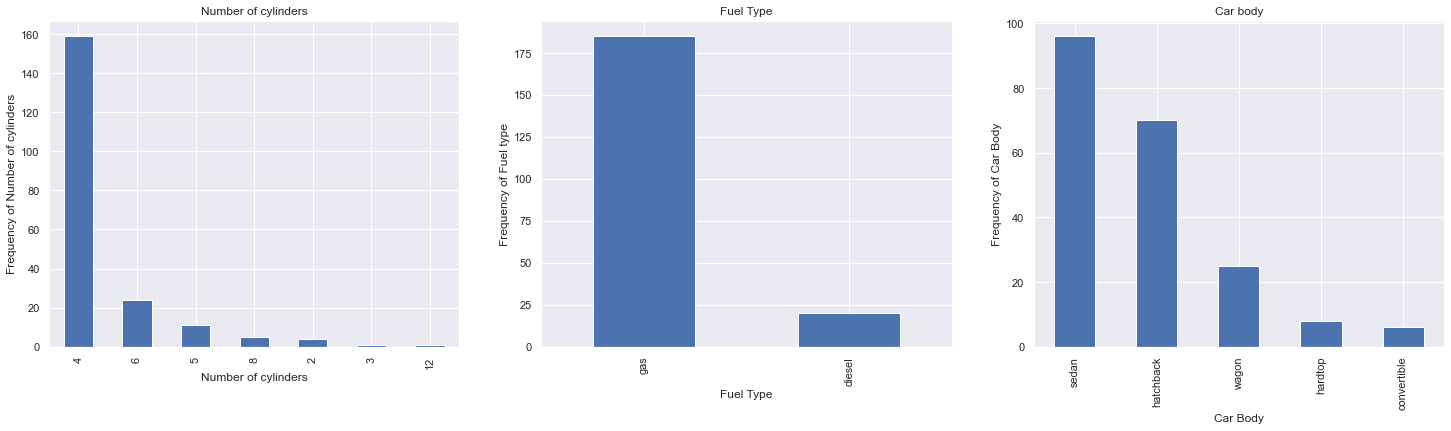

In [34]:
plt.figure(figsize=(25, 6))


plt.subplot(1,3,1)
plt1 = df_car['num-of-cylinders'].value_counts().plot(kind='bar')
plt.title('Number of cylinders')
plt1.set(xlabel = 'Number of cylinders', ylabel='Frequency of Number of cylinders')

plt.subplot(1,3,2)
plt1 = df_car['fuel-type'].value_counts().plot(kind='bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of Fuel type')

plt.subplot(1,3,3)
plt1 = df_car['body-style'].value_counts().plot(kind='bar')
plt.title('Car body')
plt1.set(xlabel = 'Car Body', ylabel='Frequency of Car Body')

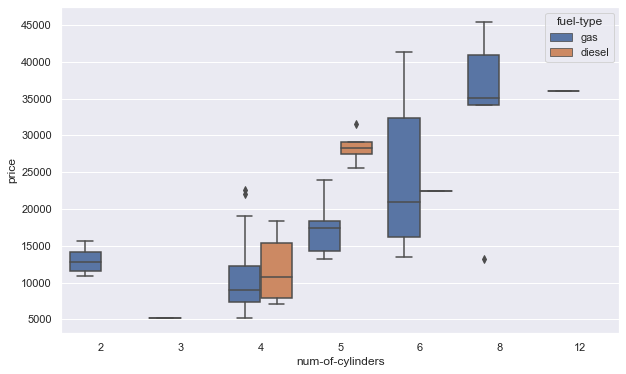

In [35]:
#Relationship between cylindernumber vs price with hue fueltype
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'num-of-cylinders', y = 'price', hue = 'fuel-type', data = df_car)
plt.show()

#### Insights:
The number of cylinders used in most cars is four.

Number of Gas fueled cars are way more than diesel fueled cars.

Sedan is the most prefered car type.

Relationship between fuelsystem vs price with hue fueltype


<Figure size 1440x432 with 0 Axes>

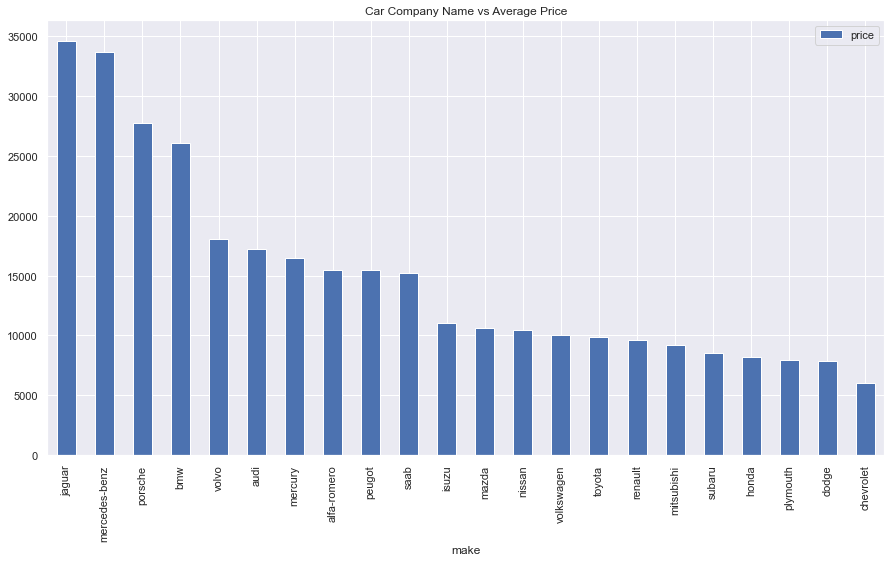

In [36]:
#Derived Metrices
#Average Price
plt.figure(figsize=(20, 6))

df_car1 = pd.DataFrame(df_car.groupby(['make'])['price'].mean().sort_values(ascending = False))
df_car1.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

#### Insights:
Jaguar,Buick and porsche seems to have the highest average price.


<Figure size 1440x432 with 0 Axes>

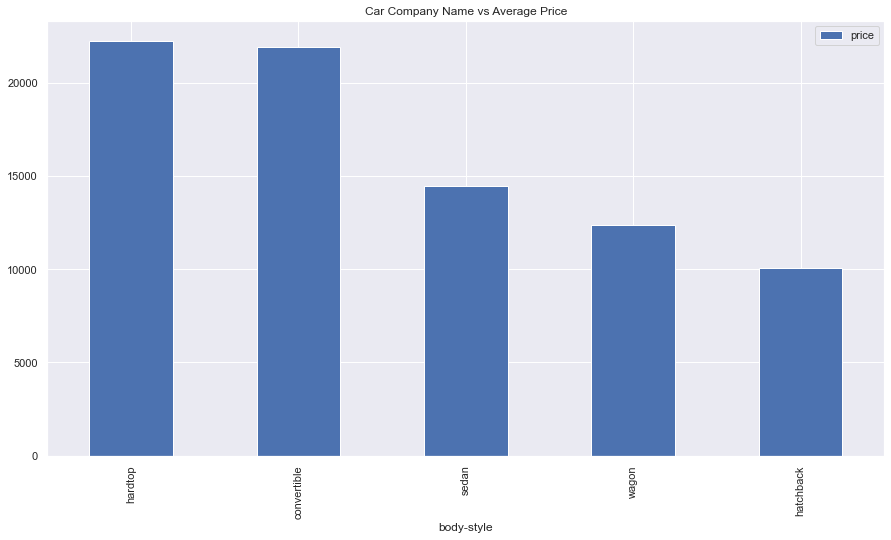

In [37]:

plt.figure(figsize=(20, 6))

df_car11 = pd.DataFrame(df_car.groupby(['body-style'])['price'].mean().sort_values(ascending = False))
df_car11.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

<Figure size 1440x432 with 0 Axes>

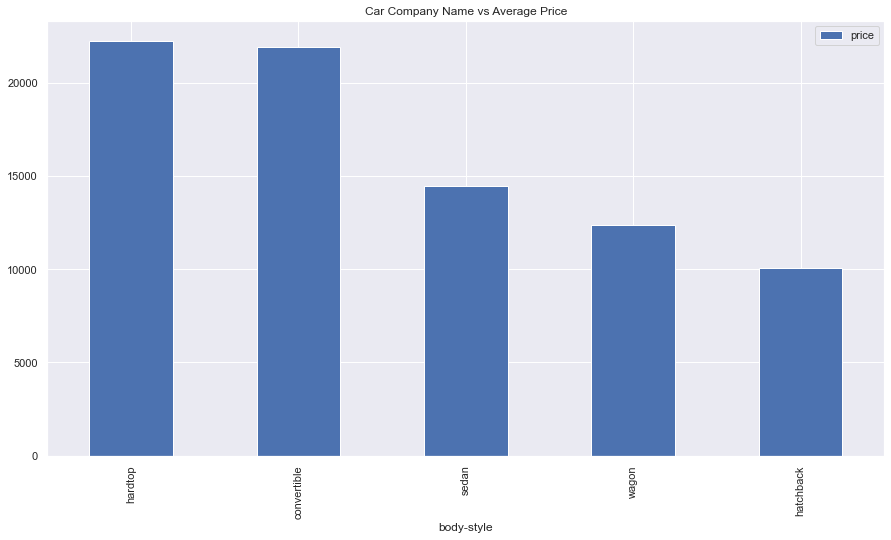

In [38]:
plt.figure(figsize=(20, 6))

df_car11 = pd.DataFrame(df_car.groupby(['body-style'])['price'].mean().sort_values(ascending = False))
df_car11.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

#### Insights:
hardtop and convertible seems to have the highest average price.

In [39]:
#Binning the Car Companies based on avg prices of each car Company.


df_car['price'] = df_car['price'].astype('float')
df_auto_temp = df_car.copy()
t = df_auto_temp.groupby(['make'])['price'].mean()
df_auto_temp = df_auto_temp.merge(t.reset_index(), how='left',on='make')
bins = [0,10000,20000,40000]
label =['Budget_Friendly','Medium_Range','TopNotch_Cars']
df_car['Cars_Category'] = pd.cut(df_auto_temp['price_y'],bins,right=False,labels=label)
df_car.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,engine-type,num-of-cylinders,engine-size,fuel-system,price,Cars_Category
0,3,alfa-romero,gas,std,2.0000,convertible,rwd,front,88.6000,dohc,4,130,mpfi,13495.0000,Medium_Range
1,3,alfa-romero,gas,std,2.0000,convertible,rwd,front,88.6000,dohc,4,130,mpfi,16500.0000,Medium_Range
2,1,alfa-romero,gas,std,2.0000,hatchback,rwd,front,94.5000,ohcv,6,152,mpfi,16500.0000,Medium_Range
3,2,audi,gas,std,4.0000,sedan,fwd,front,99.8000,ohc,4,109,mpfi,13950.0000,Medium_Range
4,2,audi,gas,std,4.0000,sedan,4wd,front,99.4000,ohc,5,136,mpfi,17450.0000,Medium_Range


#### Significant variables after Visualization
Cars_Category , Engine Type, Fuel Type
Car Body , Aspiration , Cylinder Number
Drivewheel , Curbweight , Car Length
Car Length , Car width , Engine Size
Boreratio , Horse Power , Wheel base
citympg , highwaympg , symboling

## DATA Processing :